## Importing and Processing Data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D,Dropout, Flatten, Dense
from keras import regularizers
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder # one-hot encoding for age

from PIL import Image
import os

In [2]:
path="../dataset/face_age/"


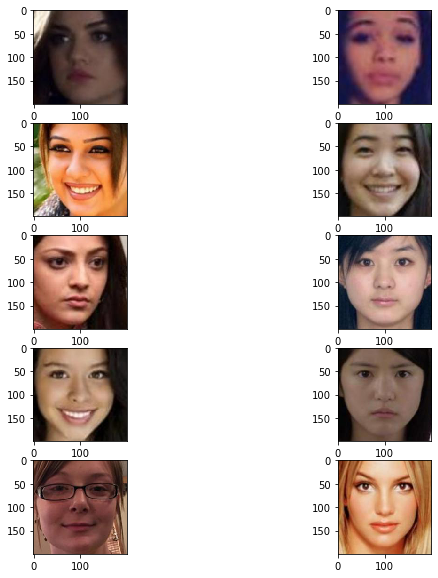

In [3]:
#Visualization of images
def visualize_image(age, number_of_images):
    plt.figure(figsize=(10, 10))
    folder=path+age+'/'
    images=os.listdir(folder)[:number_of_images]
    for i in range(number_of_images):
        img=mpimg.imread(folder+images[i])
        plt.subplot(number_of_images/2, 2, i+1)
        plt.imshow(img)

visualize_image("020", 10)

In [4]:
X=[]
y=[]

for folder, _, imgs in os.walk(path):
    if folder!="face_age":
        for img in imgs:
            img_path=folder+'/'+img
            image=Image.open(img_path)
            image=image.convert('RGB')
            X.append(np.array(image))
            y.append(int(folder[-3:]))

X=np.array(X)
y=np.array(y);

In [5]:
X=X.astype("float32")
#normalization
X/=255.0
X

array([[[[0.54901963, 0.3647059 , 0.29411766],
         [0.59607846, 0.4117647 , 0.34117648],
         [0.64705884, 0.45490196, 0.3882353 ],
         ...,
         [0.85882354, 0.59607846, 0.49019608],
         [0.85882354, 0.59607846, 0.49019608],
         [0.85882354, 0.59607846, 0.49019608]],

        [[0.54901963, 0.3647059 , 0.29411766],
         [0.59607846, 0.4117647 , 0.34117648],
         [0.64705884, 0.45490196, 0.3882353 ],
         ...,
         [0.85882354, 0.59607846, 0.49019608],
         [0.85882354, 0.59607846, 0.49019608],
         [0.8627451 , 0.6       , 0.49411765]],

        [[0.54509807, 0.36078432, 0.2901961 ],
         [0.5921569 , 0.40784314, 0.3372549 ],
         [0.6431373 , 0.4509804 , 0.38431373],
         ...,
         [0.8627451 , 0.6       , 0.49411765],
         [0.8627451 , 0.6       , 0.49411765],
         [0.8627451 , 0.6       , 0.49411765]],

        ...,

        [[0.9843137 , 0.7294118 , 0.65882355],
         [0.9843137 , 0.7294118 , 0.65882355]

In [19]:
X.shape

(19556, 200, 200, 3)

In [15]:
os.mkdir("../dataset/Data")

In [18]:
np.save("../dataset/Data/X.npy", X)
np.save("../dataset/Data/y.npy", y)
# X = np.load('../dataset/Data/X.npy')
# Y = np.load('../dataset/Data/Y.npy')

## Train, Test and Validation Datasets

In [21]:
# Train, validation and testing split (70/15/15)
test_size = 0.3
seed = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=True, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [22]:
# save to files
np.save('../dataset/Data/X_train.npy', X_train)
np.save('../dataset/Data/Y_train.npy', y_train)
np.save('../dataset/Data/X_val.npy', X_val)
np.save('../dataset/Data/Y_val.npy', y_val)
np.save('../dataset/Data/X_test.npy', y_test)
np.save('../dataset/Data/Y_test.npy', y_test)

In [23]:
# confirm the saved files
os.listdir("../dataset/Data")

['X.npy',
 'X_test.npy',
 'X_train.npy',
 'X_val.npy',
 'y.npy',
 'Y_test.npy',
 'Y_train.npy',
 'Y_val.npy']

## Image Augmentation

In [39]:
# Apply Image Augmentation

train_datagen = ImageDataGenerator(
    shear_range = 0.2, # random application of shearing
    zoom_range = 0.2, 
    horizontal_flip = True) # randomly flipping half of the images horizontally

test_datagen = ImageDataGenerator()